## [Observations and Insights ]

* After analysis, we can conclude that the Capomulin and the Ramicane treatments are the most effective with an average tumor volume lower than the other treatments, even lower than the start tumor volume. This indicates that the 2 treatments are reducing the tumor volume.

* This is confirmed by the a small tumor volume variance in the 2 treatments which indicates that they are consistent no matter the subject (mouse).

* We observe that the weight is an important factor in mice's tumor volume. A light mouse has less tumor volume. This indicates that the treatment (in this case the Capomulin treatment) is more effective on a lighter subjects.

In [1]:
# Dependencies and Setup
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = mouse_metadata.merge(study_results, on = "Mouse ID", how = "outer") 
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = data_df["Mouse ID"].count()
number_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data_df[data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates[["Mouse ID", "Timepoint"]]


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_df = data_df.drop_duplicates(["Mouse ID", "Timepoint"])
len(data_df)

1888

In [6]:
# Checking the number of mice in the clean DataFrame.
data_df["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped_df = data_df.groupby("Drug Regimen")

mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
std = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()

summary1_df = pd.DataFrame(mean)
summary1_df = summary1_df.rename({"Tumor Volume (mm3)" : "Mean"}, axis =1)
summary1_df["Median"] = median
summary1_df["Variance"] = variance
summary1_df["std"] = std
summary1_df["SEM"] = sem
summary1_df

,Mean,Median,Variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_df = grouped_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

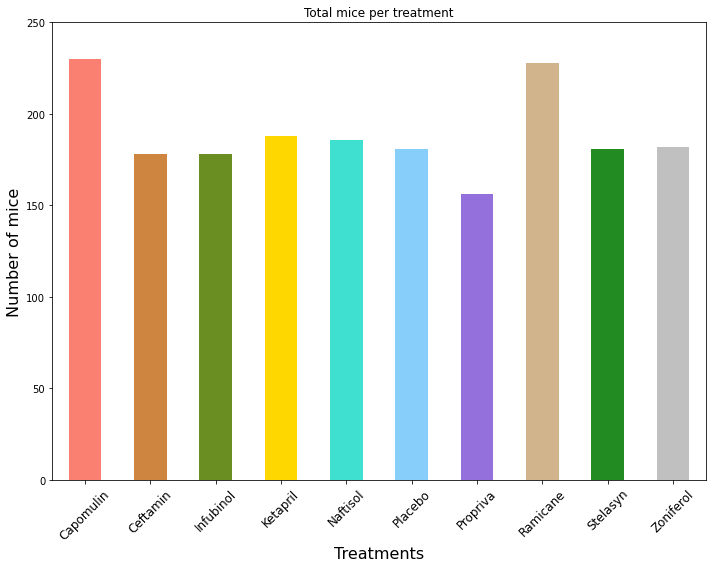

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
colors = ["salmon", "peru", "olivedrab", "gold", "turquoise", 
            "lightskyblue","mediumpurple", "tan", "forestgreen", "silver"] 
df = data_df.groupby("Drug Regimen")["Mouse ID"].count()
bar = df.plot(kind = "bar", title = "Total mice per treatment", ylim = (0, 250),
                xlim = (-0.75, len(df.index)-0.25), figsize = (10,8), color = colors)
bar.set_xticklabels(df.index,fontsize = 12, rotation = 45)
bar.set_xlabel("Treatments", fontsize = 16)
bar.set_ylabel("Number of mice", fontsize = 16)
plt.tight_layout()
plt.show()

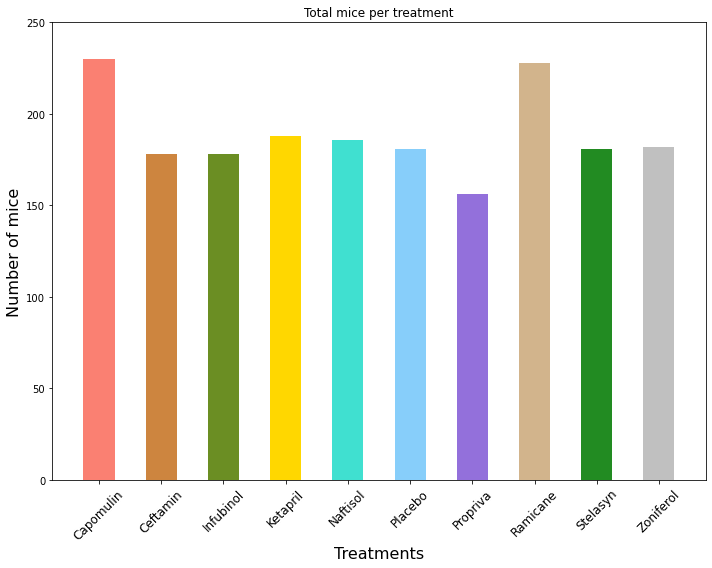

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
colors = ["salmon", "peru", "olivedrab", "gold", "turquoise", 
            "lightskyblue","mediumpurple", "tan", "forestgreen", "silver"] 
df = data_df.groupby("Drug Regimen")["Mouse ID"].count()
plt.figure(figsize = (10,8))
plt.bar(df.index, df, color = colors, width = 0.5)
plt.xticks(fontsize = 12, rotation = 45)
plt.title("Total mice per treatment")
plt.xlabel("Treatments", fontsize = 16)
plt.ylabel("Number of mice", fontsize = 16)
plt.ylim(0, 250)
plt.xlim(-0.75, len(df.index)-0.25)
plt.tight_layout()
plt.show()


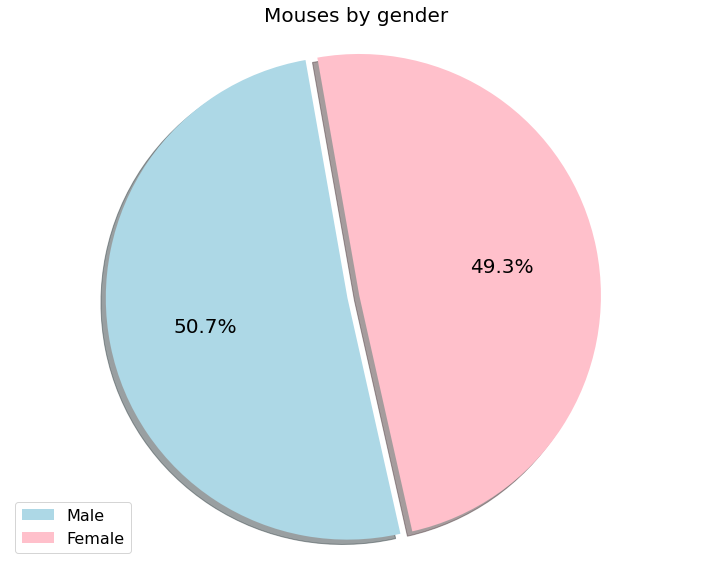

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = data_df["Sex"].value_counts() 
explode = [0.05,0]
pie1 = genders.plot(kind = "pie", colors = ["lightblue", "pink"],
                     autopct = "%1.1f%%", figsize = (10,8), explode = explode,
                     shadow = True, fontsize = 20,startangle = 100, labels = None)

pie1.legend(labels = ["Male", "Female"],loc = "lower left" ,fontsize = 16 )
pie1.set_title(label = "Mouses by gender", fontsize = 20)
pie1.set_ylabel("")
pie1.axis("equal")
plt.tight_layout()

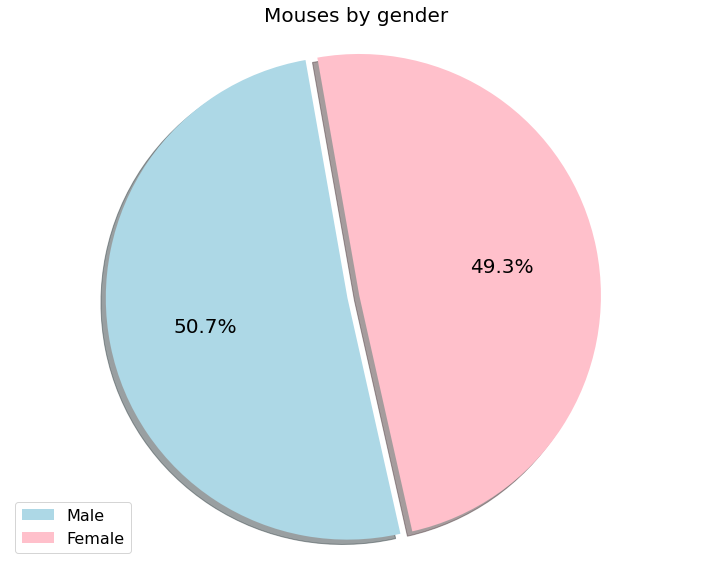

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = data_df["Sex"].value_counts() 
explode = [0.05,0]
plt.figure(figsize = (10,8))
pie2 = plt.pie(genders, colors = ["lightblue", "pink"],textprops={'size': 20},
            autopct = "%1.1f%%", explode = explode,
            shadow = True, startangle = 100, labels = None)
plt.legend(labels = ["Male", "Female"],loc = "lower left" ,fontsize = 16 )
plt.title(label = "Mouses by gender", fontsize = 20)
plt.axis("equal")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
data1_df = data_df.loc[(data_df["Drug Regimen"] == "Capomulin") | 
                        (data_df["Drug Regimen"] == "Ramicane") | 
                        (data_df["Drug Regimen"] == "Infubinol")| 
                        (data_df["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data1_df.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df = data1_df.merge(last_timepoint, on = ("Mouse ID", "Timepoint"), how = "right")
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = sorted(list(final_df["Drug Regimen"].unique()))
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset      
# Determine outliers using upper and lower boundswith a function
def outliers (treatment, name):
    name_treat = str(name)
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    outliers = [values for values in treatment if (values < lower_bound)| ((values > upper_bound))]
    print("There are " + str(len(outliers)) + " potential outliers for the " + name_treat + " treatment with "
         + str(round(lower_bound,2)) + " and " + str(round(upper_bound,2)) + " as lower and upper boundaries")
    if len(outliers) != 0 :
        print(outliers)
#the 4 treatments
capomulin_vol = final_df[(final_df["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"]
ramicane_vol = final_df[(final_df["Drug Regimen"] == "Ramicane")]["Tumor Volume (mm3)"]
infubinol_vol = final_df[(final_df["Drug Regimen"] == "Infubinol")]["Tumor Volume (mm3)"]
ceftamin_vol = final_df[(final_df["Drug Regimen"] == "Ceftamin")]["Tumor Volume (mm3)"]
outliers(capomulin_vol, treatments[0])
outliers(ceftamin_vol,treatments[1])
outliers(infubinol_vol,treatments[2])
outliers(ramicane_vol,treatments[3])

There are 0 potential outliers for the Capomulin treatment with 20.7 and 51.83 as lower and upper boundaries
There are 0 potential outliers for the Ceftamin treatment with 25.36 and 87.67 as lower and upper boundaries
There are 1 potential outliers for the Infubinol treatment with 36.83 and 82.74 as lower and upper boundaries
[36.321345799999996]
There are 0 potential outliers for the Ramicane treatment with 17.91 and 54.31 as lower and upper boundaries


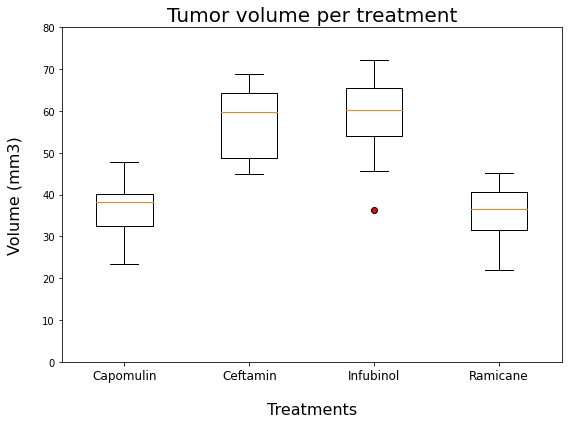

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(markerfacecolor='r')
plt.figure(figsize=(8,6))
plt.boxplot([capomulin_vol,ceftamin_vol,infubinol_vol,ramicane_vol], labels = treatments, flierprops = flierprops)
plt.xticks(fontsize = 12)
plt.xlabel("Treatments", fontsize = 16, labelpad = 20)
plt.ylabel("Volume (mm3)", fontsize = 16, labelpad = 20)
plt.ylim(0,80)
plt.title("Tumor volume per treatment", fontsize =20)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

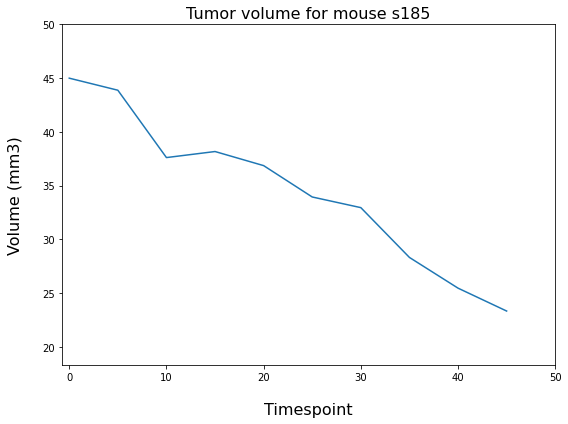

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#create a list of mouses treated with capomulin to select on of them
capomulin_mouse = data1_df[data1_df["Drug Regimen"] == "Capomulin"]["Mouse ID"]
#determine the x and y axis
x_axis = data1_df["Timepoint"].loc[data1_df["Mouse ID"] == capomulin_mouse.iloc[0]]
y_axis = data1_df["Tumor Volume (mm3)"].loc[data1_df["Mouse ID"] == capomulin_mouse.iloc[0]]
#Line plot
plt.figure(figsize = (8,6))
plt.plot(x_axis, y_axis)
plt.title("Tumor volume for mouse " + capomulin_mouse.iloc[0], fontsize = 16)
plt.xlabel("Timespoint", fontsize = 16, labelpad = 20)
plt.ylabel("Volume (mm3)", fontsize = 16, labelpad = 20)
plt.xlim(-0.75,50)
plt.ylim(min(y_axis)-5,max(y_axis)+5)
plt.tight_layout()

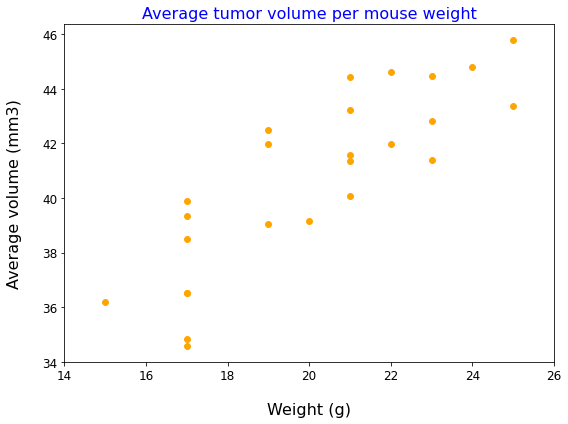

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#create the data frame
weight_df = data1_df[data1_df["Drug Regimen"] == "Capomulin"].groupby(
                        "Mouse ID").agg({"Weight (g)" : "mean","Tumor Volume (mm3)" : "mean"})
weight_df = weight_df.reset_index()
#scatter plot plot
scatter = weight_df.plot.scatter("Weight (g)",'Tumor Volume (mm3)', figsize = (8,6),
                    fontsize = 12, s = 35,c = "orange")
scatter.set_title("Average tumor volume per mouse weight",fontsize = 16, c ="b")
scatter.set_xlabel("Weight (g)", fontsize = 16, labelpad = 20)
scatter.set_ylabel("Average volume (mm3)", fontsize = 16, labelpad = 20)
scatter.set_xlim(min(weight_df["Weight (g)"])-1, max(weight_df["Weight (g)"]+1))
plt.tight_layout()

## Correlation and Regression

Weight and average tumor volume are strongly correlated. The correlation coefficient is : 0.8419
r-squared is : 0.7089


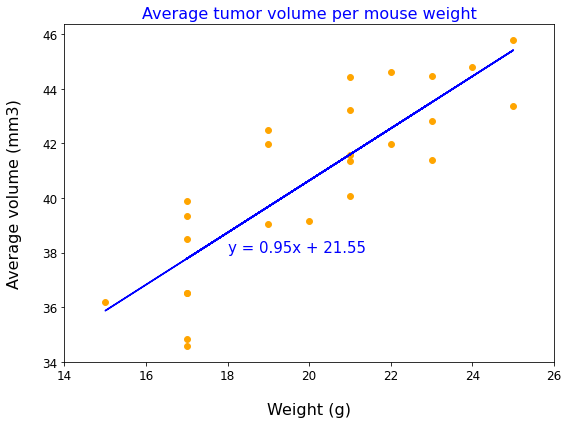

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = weight_df["Weight (g)"]
y = weight_df["Tumor Volume (mm3)"]
correlation = weight_df.corr()
print("Weight and average tumor volume are strongly correlated. The correlation coefficient is : "
         + str(round(correlation.iloc[0,1],4)))
(m, b, r, p_value, std_err ) = st.linregress(x, y)
regress_values = m * x + b
line_eq = "y = " + str(round(m,2)) +"x + " + str(round(b,2))
#plot
scatter = weight_df.plot.scatter("Weight (g)",'Tumor Volume (mm3)', figsize = (8,6),
                    fontsize = 12, s = 35,c = "orange")
scatter.set_title("Average tumor volume per mouse weight",fontsize = 16, c ="b")
scatter.set_xlabel("Weight (g)", fontsize = 16, labelpad = 20)
scatter.set_ylabel("Average volume (mm3)", fontsize = 16, labelpad = 20)
scatter.set_xlim(min(weight_df["Weight (g)"])-1, max(weight_df["Weight (g)"]+1))
plt.plot(x,regress_values,"b")
plt.annotate(line_eq,(18,38),fontsize=15,color="b")
plt.tight_layout()
print("r-squared is : " + str(round(r**2,4)))